In [94]:
import math
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

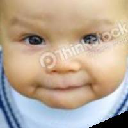

In [2]:
im =Image.open('UTKFace/1_0_0_20161219140623097.jpg.chip.jpg').resize((128,128))
im

The first character of the image file name tells us the age of the person

In [3]:
mypath = 'UTKFace'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [11]:
onlyfiles[:10]

['52_0_4_20170103235931765.jpg.chip.jpg',
 '14_1_3_20170104221658783.jpg.chip.jpg',
 '65_0_0_20170111200004259.jpg.chip.jpg',
 '21_0_2_20170117193634310.jpg.chip.jpg',
 '56_0_0_20170111171747473.jpg.chip.jpg',
 '26_1_0_20170119192657178.jpg.chip.jpg',
 '46_1_0_20170110160643141.jpg.chip.jpg',
 '32_0_3_20170119171305632.jpg.chip.jpg',
 '12_1_4_20170109214232071.jpg.chip.jpg',
 '40_0_1_20170117194057992.jpg.chip.jpg']

In [8]:
shuffle(onlyfiles)

In [13]:
age = [i.split('_')[0] for i in onlyfiles]

In [18]:
age[:10]

['52', '14', '65', '21', '56', '26', '46', '32', '12', '40']

### We can split the data into Classes 

- Children (1-12) CLASS 1
- Teenagers (12-19) CLASS 2
- ADULTS (20-60) CLASS 3
- Elders (>60) CLASS 4

In [38]:
classes = []
for i in age:
    i = int(i)
    if i <= 12:
        classes.append(1)
    if (i>12) and (i<=19):
        classes.append(2)
    if (i>=20) and (i<60):
        classes.append(3)
    if i>=60:
        classes.append(4)

In [115]:
classes = classes[:30]
classes[:10]

[3, 2, 4, 3, 3, 3, 3, 3, 1, 3]

In [128]:
len(classes)

30

In [114]:
Counter(classes[:30])

Counter({1: 7, 2: 4, 3: 17, 4: 2})

### Convert the Images into vectors 

Considering the first 1000 images for speed

In [116]:
X_data =[]
#os.chdir('UTKFace')
for file in onlyfiles[:30]:
    face = misc.imread(file)
    face =cv2.resize(face, (128, 128) )
    X_data.append(face)

In [117]:
X = np.squeeze(X_data)

In [118]:
X.shape

(30, 128, 128, 3)

In [119]:
# normalize data
X = X.astype('float32')
X /= 255

Split the data into Train and Test

In [67]:
(x_train, y_train), (x_test, y_test) = (X[:700],classes[:700]) , (X[700:] , classes[700:])

In [122]:
P = np.reshape(X, (30,49152))

In [123]:
P.shape

(30, 49152)

### PCA and T-SNE for dimensionality reduction

In [124]:
pca = PCA(n_components=1000)
pca_result = pca.fit_transform(P)

In [125]:
pca_result.shape

(30, 30)

In [126]:
tsne = TSNE(n_components=2, perplexity=40.0)

tsne_result = tsne.fit_transform(pca_result)

tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

In [131]:
df = pd.DataFrame(tsne_result_scaled, columns=('x', 'y'))
labels = classes
df['class'] = labels
df.head()

,x,y,class
0,0.736070,-0.664669,3
1,-0.755331,-0.378573,2
2,-0.516996,1.479974,4
3,-0.222610,-0.796966,3
4,0.204912,1.341501,3


<Figure size 864x864 with 0 Axes>

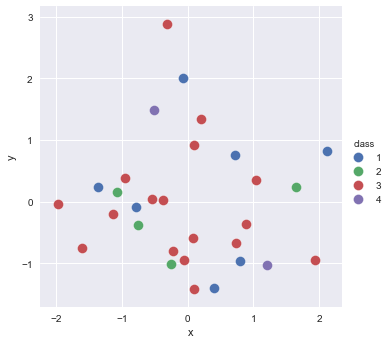

In [132]:
plt.figure(figsize=(12,12))
sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = df,hue = "class",size=5, plot_kws={"s": 100});
plt.show()

In [133]:
embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(P)

In [134]:
df = pd.DataFrame(embedding, columns=('x', 'y'))
labels = classes
df['class'] = labels
df.head()

,x,y,class
0,-1.210276,-3.754347,3
1,-3.109857,-1.475340,2
2,-1.159255,-1.173478,4
3,-3.416535,-0.896915,3
4,-1.170584,-1.782150,3


<Figure size 864x864 with 0 Axes>

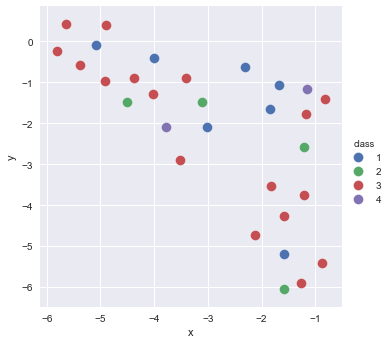

In [135]:
plt.figure(figsize=(12,12))
sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = df,hue = "class",size=5, plot_kws={"s": 100});
plt.show()